<a href="https://colab.research.google.com/github/ultraviolet-21/disaster-relief-ai/blob/main/Copy_of_DisasterRelief_Section3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#de3023"><h1><b>REMINDER MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

In [ ]:
#@title Run this to setup the environment and load the data
import re
import gdown
import seaborn as sns
import pandas as pd
import numpy as np
from torchtext.vocab import GloVe
from sklearn.model_selection import train_test_split

!wget -O ./disaster_data.csv 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Disaster%20Relief/disaster_data.csv'
dataset_path = './disaster_data.csv'

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import requests, io, zipfile

--2022-06-30 20:31:20--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Disaster%20Relief/disaster_data.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236777 (231K) [text/csv]
Saving to: ‘./disaster_data.csv’

./disaster_data.csv 100%[===================>] 231.23K  --.-KB/s    in 0.003s  

2022-06-30 20:31:20 (82.5 MB/s) - ‘./disaster_data.csv’ saved [236777/236777]



In [ ]:
#@title If the previous cell fails to load data, use this cell
import re
import gdown
import seaborn as sns
import pandas as pd
import numpy as np
from torchtext.vocab import GloVe
from sklearn.model_selection import train_test_split



from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import requests, io, zipfile

## Instructor-Led Discussion: Modeling the Meaning of Websites using Word Vectors

A shortcoming of our bag-of-words approach is that it only looks at the counts of words in each tweet. What if we had some way of understanding the meaning of words keeping the ordering in mind?

The idea of computationally extracting meaning from words is central to word vectors, which have become a cornerstone of modern deep learning on text. Word vectors are a mapping from words to vectors such that words that have similar meaning have similar word vectors.

For example, the words "good" and "great" have similar word vectors, and the words "good" and "planet" have different word vectors. Thus, word vectors provide us a way to account for the meanings of words with our machine learning models.

We will look at GLoVe Embeddings in this section.

In this notebook we'll be:
*   Exploring Word Similarities
*   Visualizing Word Vectors



###Load the Data

In [ ]:
# Load the data.
disaster_tweets = pd.read_csv('disaster_data.csv',encoding ="ISO-8859-1")

In [ ]:
disaster_tweets.head()

,tweet_id,text,category,need_or_resource
0,ca9e24c8-396d-4502-8b45-18895df5333e_0,"Donations of batteries, flashlights, and clean...",Energy,need
1,twitter_resource_tweets_1692,I want hurricane Sandy to cone so I can be stu...,None,NaN
2,625b46e2-0b81-41ea-826e-4535fe9b39b8,"Hi, I can help prepare food, serve food, offer...",Food,resource
3,twitter_resource_tweets_1699,I cant believe Sandy.....,None,NaN
4,c3bfea72-d377-445c-b4b8-e8ebca0e7fbb,I have children and adult clothes including ja...,Water,resource


###Extract the tweets and the respective labels

In [ ]:
#Read the tweet data and convert it to lowercase
tweets = disaster_tweets['text'].str.lower()
tweets = tweets.apply(lambda x: re.sub(r'[^a-zA-Z0-9]+', ' ',x))

In [ ]:
#Extract the labels from the csv
tweet_labels = disaster_tweets['category']

###Split the data into train and test set

In [ ]:
#Split the Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(tweets, tweet_labels, test_size=0.2, random_state=1,stratify = tweet_labels)

###Load the GLoVe Embeddings

In [ ]:
VEC_SIZE = 300
glove = GloVe(name='6B', dim=VEC_SIZE)

# Returns word vector for word if it exists, else return None.
def get_word_vector(word):
    try:
      return glove.vectors[glove.stoi[word.lower()]].numpy()
    except KeyError:
      return None

.vector_cache/glove.6B.zip: 862MB [02:39, 5.39MB/s]                           
100%|█████████▉| 399999/400000 [00:42<00:00, 9511.50it/s]


We've included a handy helper function which retrieves the word vector for a word

##Exercise

Let's retrieve the word vector for "good" using the above get_word_vector function (~30 seconds).

In [ ]:
### YOUR CODE HERE ###
good_vector = get_word_vector("good")
### END CODE HERE ###

print('Shape of good vector:', good_vector.shape)
print(good_vector)

Shape of good vector: (300,)
[-1.3602e-01 -1.1594e-01 -1.7078e-02 -2.9256e-01  1.6149e-02  8.6472e-02
  1.5759e-03  3.4395e-01  2.1661e-01 -2.1366e+00  3.5278e-01 -2.3909e-01
 -2.2174e-01  3.6413e-01 -4.5021e-01  1.2104e-01 -1.5596e-01 -3.8906e-02
 -2.9419e-03  1.6009e-02 -1.1620e-01  3.8680e-01  3.5109e-01  9.7426e-02
 -1.2425e-02 -1.7864e-01 -2.3259e-01 -2.6960e-01  4.1083e-02 -7.6194e-02
 -2.3362e-01  2.0919e-01 -2.7264e-01  5.4967e-02 -1.8055e+00  5.6348e-01
 -1.2778e-01  2.3147e-01 -5.8820e-03 -2.6630e-01  4.1187e-01 -3.7162e-01
 -2.0600e-01 -1.9619e-01 -4.3945e-03  1.2513e-01  4.6638e-01  4.5159e-01
 -1.5000e-01  5.9589e-03  5.9070e-02 -4.1440e-01  6.1035e-02 -2.1117e-01
 -4.0988e-01  5.6393e-01  2.3021e-01  2.7240e-01  4.9364e-02  1.4239e-01
  4.1841e-01 -1.3983e-01  3.4826e-01 -1.0745e-01 -2.5002e-01 -3.2554e-01
  3.3343e-01 -3.5617e-01  2.0442e-01  1.4439e-01 -1.2686e-01 -7.7273e-02
 -1.9667e-01  1.0759e-01 -1.1860e-01 -2.5083e-01  1.4205e-02  2.7251e-01
 -2.3707e-01 -2.3545e-

Well not much to see here–each word vector is a vector of 300 numbers, and it's hard to interpret them from looking at the numbers. Remember that the important property of word vectors is that words with similar meaning have similar word vectors. The magic happens when we compare word vectors.

Below, we have set up a demo where we compare the word vectors for two words using a comparison metric known as cosine similarity. Intuitively, cosine similarity measures the extent to which two vectors point in the same direction. You might be familiar with the fact that the cosine similarity between two vectors is the same as the cosine of the angle between the two vectors–ranging between -1 and 1. -1 means that two vectors are facing opposite directions, 0 means that they are perpindicular, and 1 means that they are facing the same direction.



##Instructor-Led Discussion: Comparing Word Similarities

Try running the below to compare the vectors for "good" and "great", and then try other words, like "planet". What do you notice that's expected and unexpected? Play around for a couple of minutes then discuss as a class.

Note that the demo runs automatically when you change either word1 or word2.

In [ ]:
def cosine_similarity(vec1, vec2):
  return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

word1 = "water" #@param {type:"string"}
word2 = "drink" #@param {type:"string"}

print('Word 1:', word1)
print('Word 2:', word2)

def cosine_similarity_of_words(word1, word2):
  vec1 = get_word_vector(word1)
  vec2 = get_word_vector(word2)

  if vec1 is None:
    print(word1, 'is not a valid word. Try another.')
  if vec2 is None:
    print(word2, 'is not a valid word. Try another.')
  if vec1 is None or vec2 is None:
    return None

  return cosine_similarity(vec1, vec2)


print('\nCosine similarity:', cosine_similarity_of_words(word1, word2))

Word 1: water
Word 2: drink

Cosine similarity: 0.4442168


In [ ]:
#@title Word Similarity { run: "auto", display-mode: "both" }

def cosine_similarity(vec1, vec2):
  return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

word1 = "food" #@param {type:"string"}
word2 = "eat" #@param {type:"string"}

print('Word 1:', word1)
print('Word 2:', word2)

def cosine_similarity_of_words(word1, word2):
  vec1 = get_word_vector(word1)
  vec2 = get_word_vector(word2)

  if vec1 is None:
    print(word1, 'is not a valid word. Try another.')
  if vec2 is None:
    print(word2, 'is not a valid word. Try another.')
  if vec1 is None or vec2 is None:
    return None

  return cosine_similarity(vec1, vec2)


print('\nCosine similarity:', cosine_similarity_of_words(word1, word2))

Word 1: food
Word 2: eat

Cosine similarity: 0.59030044


We can see that word embeddings appear to capture the meaning of different words–when two words are similar, the cosine similarity score is higher, and when two words are dissimilar, the cosine similarity score is lower.

Word vectors are created by going over a large body of text (the vectors you are using were trained on Wikipedia in part) and noticing which words tend to occur near each-other. If word A tends to co-occur with similar words as word B, then the word vectors for words A and B are mathematically constrained to be similar. If you want to learn more about an algorithm for training word vectors, see this [helpful introduction to word2vec](https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa).

Given word vectors that represent the meaning of words, what can we do with this? We can add word vectors to our feature vector, but which do we choose? It turns out that a solid approach is just to average the word vectors for all the words in the description. Averaging word vectors produces a natural way to produce vectors for sentences and other collections of words, and this is the approach we will use.

## Exercise

We want to write a function that takes a list of descriptions and turns it into an array containing the average GloVe vector for each description. **Understand the code below and then increment found_words and add vec to X[i].**

In [ ]:
def glove_transform_data_descriptions(descriptions):
    X = np.zeros((len(descriptions), VEC_SIZE))
    for i, description in enumerate(descriptions):
        found_words = 0.0
        description = description.strip()
        for word in description.split():
            vec = get_word_vector(word)
            if vec is not None:
                ### YOUR CODE HERE ###
                # Increment found_words and add vec to X[i].
                found_words += 1
                X[i] += vec

                ### END CODE HERE ###
        # We divide the sum by the number of words added, so we have the
        # average word vector.
        if found_words > 0:
            X[i] /= found_words

    return X

glove_train_X = glove_transform_data_descriptions(X_train)
glove_train_y = [label for label in y_train]

glove_test_X = glove_transform_data_descriptions(X_test)
glove_test_y = [label for label in y_test]

In [ ]:
len(glove_train_y)

1120

## Exercise

Then, we can evaluate our approach as we have in the past. As before, fill in the code for fitting and evaluation (~8 minutes).

In [ ]:
model = LogisticRegression()
### YOUR CODE HERE ###
model.fit(glove_train_X, glove_train_y)
glove_test_y_pred = model.predict(glove_test_X)
print(accuracy_score(glove_test_y_pred, glove_test_y))
### END CODE HERE ###

0.8790035587188612


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


###Exercise(Discussion): Why do you think the accuracy didn't change much even though we introduced word embeddings as our features?

In [ ]:
print(classification_report(y_test,glove_test_y_pred, target_names=['Energy', 'Food', 'Medical', 'None', 'Water']))

              precision    recall  f1-score   support

      Energy       0.75      0.69      0.72        35
        Food       0.92      0.97      0.95       133
     Medical       0.89      0.73      0.80        11
        None       0.84      0.87      0.85        77
       Water       0.95      0.76      0.84        25

    accuracy                           0.88       281
   macro avg       0.87      0.80      0.83       281
weighted avg       0.88      0.88      0.88       281



In [ ]:
#@title Helper Function-Confusion Matrix
'''
Plots the confusion Matrix and saves it
'''
def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ['Energy', 'Food', 'Medical', 'None', 'Water']
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure()
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5,3.5,4.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()




Plotting the Confusion Matrix


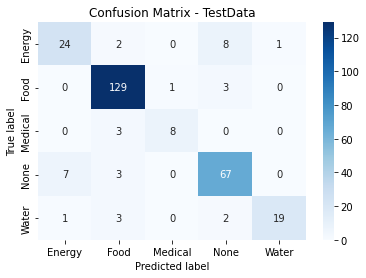

In [ ]:
plot_confusion_matrix(y_test,glove_test_y_pred)

###Evaluate

*Let's see how our classifier did! We will train our classifier on 80% of the dataset and then test it on 20%. This is called a train-test split and is usually done to evaluate models.*

In [ ]:
#@title Get the list of incorrect tweets
pd.set_option('max_colwidth', 500)
incorrect_tweets = []
incorrect_y_test = []
incorrect_y_pred = []
for (t,x,y) in zip(X_test,y_test,glove_test_y_pred):
  if x != y:
    incorrect_tweets.append(t)
    incorrect_y_test.append(x)
    incorrect_y_pred.append(y)

NameError: name 'pd' is not defined

In [ ]:
table=pd.DataFrame([incorrect_tweets,incorrect_y_pred,incorrect_y_test]).transpose()
table.columns = ['Tweet', 'Predicted Category', 'True Category']

In [ ]:
table

,Tweet,Predicted Category,True Category
0,senior nursing students we graduate this december and we want to help we can give basic medical care hand out blankets you name it we will do it thanks,Food,Medical
1,a few friends and i are happy to distribute meds,Food,Medical
2,eating cold chinese food with a flash light sandyprobs,None,Energy
3,hello there i have two trucks worth of goods water supplies clothes everything please email me at,Food,Water
4,i need groceries not because of the storm just legit need groceries,None,Food
5,sandy is so angry power is down wind over 90 mph,None,Energy
6,over 25 people in line at starbucks people need coffee as much as they need food and gas post sandy starbucks http t co t7g3fbjg,Food,None
7,i can bring batteries toiletries non perishable items hygiene products towels,Food,Energy
8,my powers out no xbox today hurricane sandy,None,Energy
9,i have a few baby supplies diapers formula blankets to give as well as water and some feminine hygiene products,Food,Water


###Exercise(Discussion): Can you figure out why some of these tweets were incorrectly classified?

###Visualizing Word Vectors with t-SNE

We will plot the words using the word embeddings in this section to derive relationships based on the context of the tweets. Learn more about t-SNE [here.](https://blog.clairvoyantsoft.com/mlmuse-visualisation-of-high-dimensional-data-using-t-sne-ac6264316d7f)

A t-SNE demo is also available [here!](https://distill.pub/2016/misread-tsne/)

In [ ]:
#@title Helper Function to Visualize the Embeddings
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE

import re
import matplotlib.pyplot as plt

def clean(text):
    """Remove posting header, split by sentences and words, keep only letters"""
    lines = re.split('[?!.:]\s', re.sub('^.*Lines: \d+', '', re.sub('\n', ' ', text)))
    return [re.sub('[^a-zA-Z]', ' ', line).lower().split() for line in lines]

sentences = [line for text in tweets for line in clean(text)]

#min-count variable helps us eliminate the words which rarely occur!
model = Word2Vec(sentences, workers=4, size=100, min_count=30, window=10, sample=1e-3)


def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


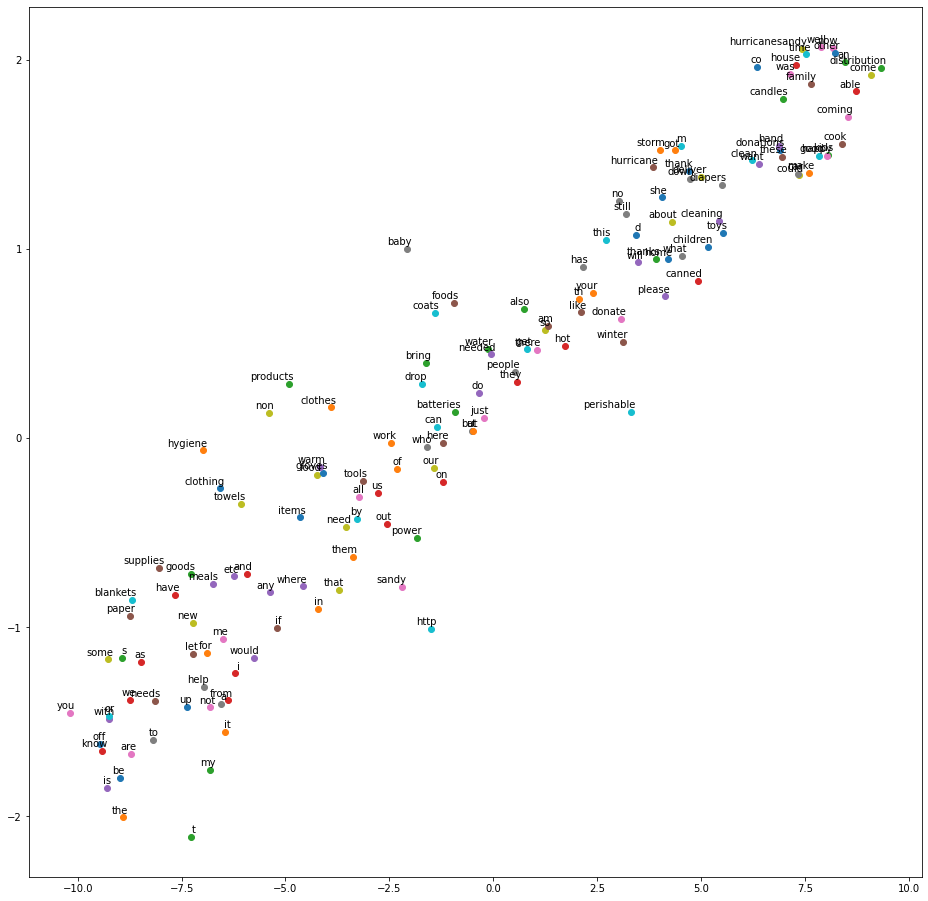

In [ ]:
tsne_plot(model)

###Exercise(Discussion): Do you notice that similar words are placed close by?

#Finish!